In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [2]:
train = pd.read_csv("train_LZdllcl.csv")
test = pd.read_csv("test_2umaH9m.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
train['education'].replace(np.nan,"Bachelor's",inplace=True)
test['education'].replace(np.nan,"Bachelor's",inplace=True)

In [11]:
train["education"].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [12]:
train['education'].replace("Master's & above",3,inplace=True)
test['education'].replace("Master's & above",3,inplace=True)
train['education'].replace("Bachelor's",2,inplace=True)
test['education'].replace("Bachelor's",2,inplace=True)
train['education'].replace("Below Secondary",1,inplace=True)
test['education'].replace("Below Secondary",1,inplace=True)

In [13]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [14]:
train['previous_year_rating'].replace(np.nan,3.,inplace=True)
test['previous_year_rating'].replace(np.nan,3.,inplace=True)

In [15]:
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

train['tot_score'] = train['avg_training_score'] * train['no_of_trainings']
test['tot_score'] = test['avg_training_score'] * test['no_of_trainings']

In [16]:
train[train['is_promoted']==1].groupby('previous_year_rating')['is_promoted'].count()
train.groupby('previous_year_rating')['is_promoted'].count()

previous_year_rating
1.0     6223
2.0     4225
3.0    22742
4.0     9877
5.0    11741
Name: is_promoted, dtype: int64

In [17]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
sum_metric              0
tot_score               0
dtype: int64

In [18]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
sum_metric              0
tot_score               0
dtype: int64

In [19]:
# saving the employee_id
emp_id = test['employee_id']

train = train.drop(['employee_id'],axis = 1)
test = test.drop(['employee_id'],axis = 1)

In [20]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,tot_score
0,Sales & Marketing,region_7,3,f,sourcing,1,35,5.0,8,1,0,49,0,6.0,49
1,Operations,region_22,2,m,other,1,30,5.0,4,0,0,60,0,5.0,60
2,Sales & Marketing,region_19,2,m,sourcing,1,34,3.0,7,0,0,50,0,3.0,50
3,Sales & Marketing,region_23,2,m,other,2,39,1.0,10,0,0,50,0,1.0,100
4,Technology,region_26,2,m,other,1,45,3.0,2,0,0,73,0,3.0,73


In [21]:
le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.transform(test['department'])
train['region'] = le.fit_transform(train['region'])
test['region'] = le.transform(test['region'])
train['education'] = le.fit_transform(train['education'])
test['education'] = le.transform(test['education'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.transform(test['gender'])
train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
test['recruitment_channel'] = le.transform(test['recruitment_channel'])

In [22]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,tot_score
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0,6.0,49
1,4,14,1,1,0,1,30,5.0,4,0,0,60,0,5.0,60
2,7,10,1,1,2,1,34,3.0,7,0,0,50,0,3.0,50
3,7,15,1,1,0,2,39,1.0,10,0,0,50,0,1.0,100
4,8,18,1,1,0,1,45,3.0,2,0,0,73,0,3.0,73


In [23]:
train = train.drop(['recruitment_channel'],axis = 1)
test = test.drop(['recruitment_channel'],axis = 1)

In [24]:
train.head()

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,tot_score
0,7,31,2,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,14,1,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,10,1,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,15,1,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,18,1,1,1,45,3.0,2,0,0,73,0,3.0,73


In [25]:
x = train.drop(['is_promoted'],axis = 1)
y = train['is_promoted']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [27]:
clf = LogisticRegression(random_state=0,solver = 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred=clf.predict(X_test)

In [29]:
# matrix = confusion_matrix(y_test,y_pred)
value = accuracy_score(y_test,y_pred)
print(value)

0.915464145518881


In [30]:
pres = precision_score(y_test, y_pred)
print(pres)

0.5124378109452736


In [31]:
f1 = f1_score(y_test, y_pred,average='micro')
print(f1)
print(f1*100)

0.9154641455188809
91.54641455188809


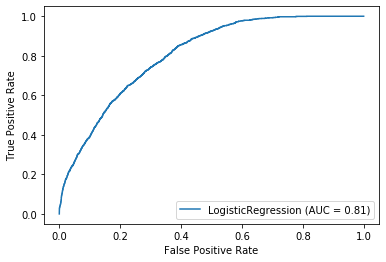

In [32]:
metrics.plot_roc_curve(clf,X_test,y_test)

In [33]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
recal = recall_score(y_test,y_pred)
print(recal)

0.06714471968709257


In [34]:
sub = pd.read_csv('sample_submission_M0L0uXE.csv')
print(sub.head())

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [35]:
pred = clf.predict(test)
print(pred)

[0 0 0 ... 0 0 0]


In [36]:
sub['is_promoted'] = clf.predict(test)

In [37]:
sub.to_csv("submission.csv", index=False)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

In [40]:
print("Training Accuracy :", rfc.score(X_train,y_train))

Training Accuracy : 0.9995915143923095


In [41]:
sub1 = pd.read_csv('sample_submission_M0L0uXE.csv')
print(sub1.head())

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [42]:
pred = rfc.predict(test)
print(pred)

[0 0 0 ... 0 0 0]


In [43]:
sub1['is_promoted'] = rfc.predict(test)

In [44]:
sub1.to_csv("submission1.csv", index=False)

In [45]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

In [46]:
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

lgb_pred = lgb.predict(X_test)

print("Training Accuracy :", lgb.score(X_train,y_train))

Training Accuracy : 0.9445548868494866


In [47]:
sub2 = pd.read_csv('sample_submission_M0L0uXE.csv')
print(sub2.head())

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [48]:
pred = lgb.predict(test)
print(pred)

[0 0 0 ... 0 0 1]


In [49]:
sub2['is_promoted'] = lgb.predict(test)

In [50]:
sub2.to_csv("submission2.csv", index=False)

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

etc_pred = etc.predict(X_test)

print("Training Accuracy :", etc.score(X_train,y_train))

Training Accuracy : 0.9995915143923095


In [52]:
sub3 = pd.read_csv('sample_submission_M0L0uXE.csv')
print(sub3.head())

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [53]:
pred = etc.predict(test)
print(pred)

[1 0 0 ... 0 0 0]


In [54]:
sub3['is_promoted'] = etc.predict(test)

In [55]:
sub3.to_csv("submission3.csv", index=False)

In [56]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

In [57]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

xgb_pred = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train,y_train))

Training Accuracy : 0.9518803954140682


In [58]:
sub4 = pd.read_csv('sample_submission_M0L0uXE.csv')
print(sub4.head())

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [59]:
pred = xgb.predict(test)
print(pred)

[0 0 0 ... 0 0 1]


In [60]:
sub4['is_promoted'] = xgb.predict(test)